## This skript should analyse and plot the residual sum of squares for each model
- load the results table
- use formula to compute residual sum of squares

#### Information about Residual sum of squares from [this blog post](https://www.geeksforgeeks.org/how-to-calculate-residual-sum-of-squares-in-python/):
The residual sum of squares (RSS) calculates the degree of variance in a regression model. It estimates the level of error in the model’s prediction. The smaller the residual sum of squares, the better your model fits your data; the larger the residual sum of squares, the worse. It is the sum of squares of the observed data minus the predicted data. 

In [1]:
# import 
# imports
import cobra
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #plot 
import scipy.stats as stats # z score normalization
from importlib import reload

# config preperation
import sys # append path

sys.path.append('../scripts/')
import helperFunction as hf
# reload(hf)


config_name = 'model_config'
config_path = f'../config/{config_name}.yaml'

# load config
with open(config_path, 'r') as file:
    config = yaml.safe_load(file)


In [ ]:
# script:

# import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #plot 

import itertools # plot of the top 3 perfoming models

# config preperation
import sys # append path

sys.path.append('../scripts/')
import helperFunction as hf

config = hf.load_config()

def plot_RSS(value_dict, conditions, title, y_label, color_list = []):
    '''Plot the RSS for each model given by the value_dict
    e.g. value_dict = {'iYali4_model': [0.0036525137174046765],...}
    @params: min and max values are used for limiting the y-axis
    @trick: (is extendable) is able to plot conditions for different models'''
    min_value = min(value_dict.values())[0]
    max_value = max(value_dict.values())[-1]
    
    x = np.arange(len(conditions))  # the label locations
    width = 0.01  # the width of the bars
    multiplier = 0
    fig, ax = plt.subplots(layout='constrained')

    
    idx = 0
    for attribute, measurement in value_dict.items():
        offset = width * multiplier
        print(attribute.split('_')[0])
        if color_list != []:
            rects = ax.bar(x + offset, measurement, width, label=attribute.split('_')[0], color=color_list[idx])
        else:
            rects = ax.bar(x + offset, measurement, width, label=attribute.split('_')[0])
        # ax.bar_label(rects, padding=3)
        multiplier += 1
        idx += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_xticks(x + width, conditions)
    ax.legend(loc='upper left', ncol=3)
    ax.set_ylim(min_value - 0.1 * abs(min_value), max_value + 0.1 * abs(max_value))

    plt.show()

def main():
    # load dataframe with experimental results
    condition_name = config['general']['condition_name']
    growth_rates = pd.read_csv(f'../results/FBA_results/{condition_name}_simulated_growth_rates.csv', sep=config['seperator'])

    # for each column except experimental growth rate and uptake compute residual sum of squares
    experimental_col = [col for col in growth_rates.columns if "experimental" in col][0]
    simulation_cols = [col for col in growth_rates.columns if "experimental" not in col and "uptake" not in col]

    # get dict with col_name: rss
    rss_dict = {}

    for col_name in simulation_cols:
        rss_dict[col_name] = np.sum(np.square(growth_rates[col_name] - growth_rates[experimental_col]))
        # print(f'{col_name}: \n\tresidual sum of squares is : {rss_dict[col_name]} ')

    # sort dict by rss
    rss_dict = {k: [v] for k, v in sorted(rss_dict.items(), key=lambda item: item[1])}

    top_3_rss = dict(itertools.islice(rss_dict.items(), 3))
    conditions = ["Glucose Experiments\n(from Chan et al. 2017 and Guo et al. 2022)"]

    ylabel = 'Residual sum of squares (RSS)'
    title = 'Model quality using Residual sum of squares'
    plot_RSS(top_3_rss, conditions, title, ylabel, color_list=['red', 'orange', 'green'])


if __name__ == '__main__':
    main()



### Alles für ein Model und dann Funktion in for schleife

['iYli21_model',
 'iYali4(cor)_model',
 'iMK735(cor)_model',
 'iNL895(cor)_model',
 'iYli_2_0(cor)_model',
 'iYLI647(cor)_model']

'experimental_growth'

In [2]:


# load dataframe with experimental results
condition_name = config['general']['condition_name']
growth_rates = pd.read_csv(f'../results/FBA_results/{condition_name}_simulated_growth_rates.csv', sep=config['seperator'])

# for each column except experimental growth rate and uptake compute residual sum of squares
experimental_col = [col for col in growth_rates.columns if "experimental" in col][0]
simulation_cols = [col for col in growth_rates.columns if "experimental" not in col and "uptake" not in col]

# get dict with col_name: rss
rss_dict = {}

for col_name in simulation_cols:
    rss_dict[col_name] = np.sum(np.square(growth_rates[col_name] - growth_rates[experimental_col]))
    # print(f'{col_name}: \n\tresidual sum of squares is : {rss_dict[col_name]} ')

# sort dict by rss
rss_dict = {k: [v] for k, v in sorted(rss_dict.items(), key=lambda item: item[1])}
rss_dict

# condition: 
# glucose: 2.43;, 0.64, 0.95, 0.33, 0.72, 0.98, 2.09; maintenance: 7.8625 mmol/gDW/h
# => iYli4 is best model, followed by iYli21, iYLI647, iMK735, iYli_2_0, iNL895 
# {'iYali4_model': 0.0036525137174046765,
#  'iYli21_model': 0.0037135100227187537,
#  'iYLI647_model': 0.007030879079579782,
#  'iMK735_model': 0.009745569136267328,
#  'iYli_2_0_model': 0.029396525854380663,
#  'iNL895_model': 0.07603125418480075}

# fructose: 2.43;, 0.64, 0.95, 0.33, 0.72, 0.98, 2.09; maintenance: 7.8625 mmol/gDW/h
# => Ich nehme hier aber an, dass Fructose und Glucose gleich schnell verstoffwechselt werden probably falsch
# {'iYali4_model': 0.003652514350945003, # a bit different
#  'iYli21_model': 0.0037135100227184943, # a bit different
#  'iYLI647_model': 0.007030879079579782, # no differnce
#  'iMK735_model': 0.014008266594205399, # a bit different
#  'iYli_2_0_model': 0.031926469609018834, # a bit different
#  'iNL895_model': 0.07603125418480075} # no differnce


{'iYali4(cor)_model': [0.0036525143509448586],
 'iYli21_model': [0.0037135099006325007],
 'iYLI647(cor)_model': [0.007030879079579828],
 'iMK735(cor)_model': [0.00974556913640822],
 'iYli_2_0(cor)_model': [0.029396525854373128],
 'iNL895(cor)_model': [0.07603125418485863]}

### Plot the results for each model

In [3]:
top_3_rss

NameError: name 'top_3_rss' is not defined

In [16]:
def plot_RSS(value_dict, conditions, title, y_label, color_list = []):
    '''Plot the RSS for each model given by the value_dict
    e.g. value_dict = {'iYali4_model': [0.0036525137174046765],...}
    @params: min and max values are used for limiting the y-axis
    @trick: (is extendable) is able to plot conditions for different models'''
    min_value = min(value_dict.values())[0]
    max_value = max(value_dict.values())[-1]
    
    x = np.arange(len(conditions))  # the label locations
    width = 0.01  # the width of the bars
    multiplier = 0
    fig, ax = plt.subplots(layout='constrained')

    
    idx = 0
    for attribute, measurement in value_dict.items():
        offset = width * multiplier
        print(attribute.split('_')[0])
        if color_list != []:
            rects = ax.bar(x + offset, measurement, width, label='_'.join(attribute.split('_')[0:-1]), color=color_list[idx])
        else:
            rects = ax.bar(x + offset, measurement, width, label=attribute.split('_')[0])
        # ax.bar_label(rects, padding=3)
        multiplier += 1
        idx += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_xticks(x + width, conditions)
    ax.legend(loc='upper left', ncol=3)
    ax.set_ylim(min_value - 0.1 * abs(min_value), max_value + 0.1 * abs(max_value))

    plt.show()

In [15]:
rss_dict.keys()

dict_keys(['iYali4(cor)_model', 'iYli21_model', 'iYLI647(cor)_model', 'iMK735(cor)_model', 'iYli_2_0(cor)_model', 'iNL895(cor)_model'])

iYali4(cor)
iYli21
iYLI647(cor)
iMK735(cor)
iYli
iNL895(cor)


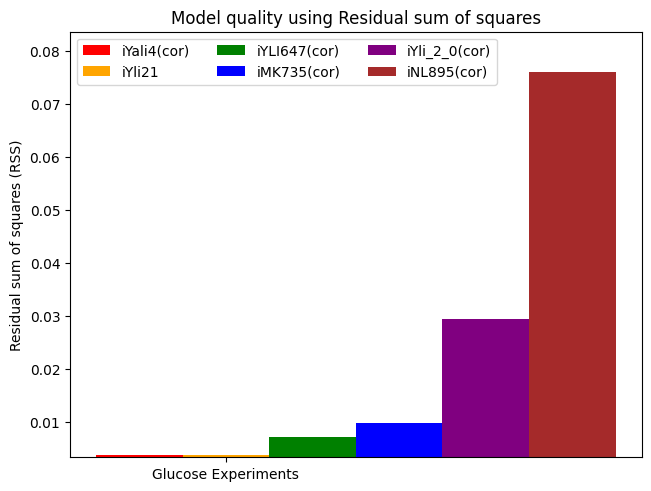

In [17]:
# code from stackoverflow (https://stackoverflow.com/questions/62104874/multiple-bars-in-one-bar-plot)
# plot of all models

_use_normalization = False

conditions = ["Glucose Experiments"]
min_value = min(rss_dict.values())[0]
max_value = max(rss_dict.values())[0]

if _use_normalization:
    rss_df = pd.DataFrame.from_dict({'model': rss_dict.keys(), 'rss_raw': [val[0] for val in rss_dict.values()]})
    rss_df['rss_norm'] = stats.zscore(rss_df['rss_raw'])
    zipped_dict = dict(zip(rss_df['model'], rss_df['rss_norm']))
    rss_dict = {key: [value] for key, value in zipped_dict.items()}
    min_value = rss_df['rss_norm'].min()
    max_value = rss_df['rss_norm'].max()

ylabel = 'Residual sum of squares (RSS)'
title = 'Model quality using Residual sum of squares'
plot_RSS(rss_dict, conditions, title, ylabel, color_list=['red', 'orange', 'green', 'blue', 'purple', 'brown'])



In [7]:
top_3_rss

{'iYali4(cor)_model': [0.0036525143509448586],
 'iYli21_model': [0.0037135099006325007],
 'iYLI647(cor)_model': [0.007030879079579828]}

iYali4(cor)
iYli21
iYLI647(cor)


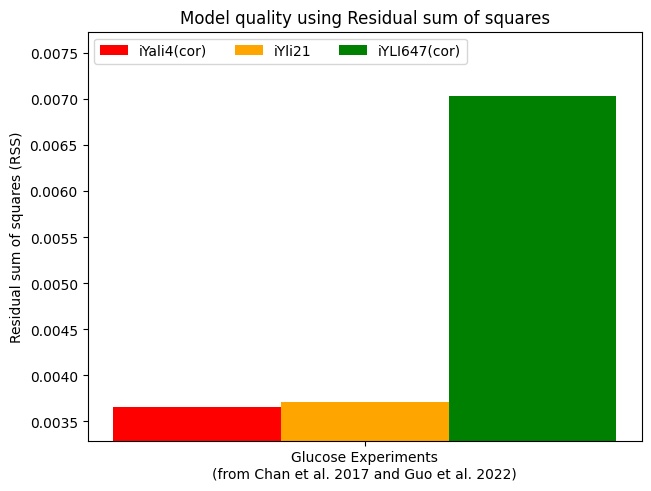

In [10]:
# plot of the top 3 perfoming models
import itertools

top_3_rss = dict(itertools.islice(rss_dict.items(), 3))
conditions = ["Glucose Experiments\n(from Chan et al. 2017 and Guo et al. 2022)"]

ylabel = 'Residual sum of squares (RSS)'
title = 'Model quality using Residual sum of squares'
plot_RSS(top_3_rss, conditions, title, ylabel, color_list=['red', 'orange', 'green'])


#### Plot for iYli21, iYali4 and iMT1026v3

In [10]:
# example:
# need growth rates for each model and each condition, 
# glucose 1.7, 
# fructose 1.7, 
# glucose + fructose 1.7*0.457 = 0,7769, 1.7*0.543 = 0,9231, 
# glycerol: uptake in ppa: 0.65 -> grwoth rate: 0.035 (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5743807/)

# load models
import cobra
# global variables
_yli_maintenance = (7.8625, 7.8625)
_ppa_maintenance = (0.55, 0.55) # (according to the paper:https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6838487/)

# # load iMT1026v3 model
iMT1026v3_model = cobra.io.read_sbml_model(config['models']['ppa1026v3'])

# load yli21 model
iYli21_model = cobra.io.read_sbml_model(config['models']['yli21'])

# load yali4 model
iYali4_model = cobra.io.read_sbml_model(config['models']['yli4_corr'])


Model does not contain SBML fbc package information.
SBML package 'layout' not supported by cobrapy, information is not parsed
SBML package 'render' not supported by cobrapy, information is not parsed
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_oligoP_v "oligophosphate (5-P)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_polyP_v "polyphosphate (100-P)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_h2o_v "H2O">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_h2o_c "H2O">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ppi_c "Diphosphate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_h_c "H+">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pi_c

In [51]:
# compute growth rates
# conditions: 
# glucose 1.7, 
# fructose 1.7, 
# glucose + fructose 1.7*0.457 = 0.7769, 1.7*0.543 = 0.9231, 
# glycerol: uptake in ppa: 0.65 -> grwoth rate: 0.035 (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5743807/)

# model specific parameters iYli21
print("iYli21:")
biomass_rxn = 'biomass_C'
maintenance_rxn = 'xMAINTENANCE'
growth_condition = {
    'R1070': 2.285, # glucose
    'R1065': 2.715, # fructose
    'R1141': 0, # glycerol
}
try:
    hf.getReactionFluxes(iYli21_model, {}, biomass_rxn, growth_condition, maintenance_rxn, _yli_maintenance, verbose=True)
except:
    print("iYli21: no solution found")

# iYali4 results
print("iYALI4:")
biomass_rxn = 'biomass_C'
maintenance_rxn = 'xMAINTENANCE'
growth_condition = {
    '1714': 2.285, # glucose
    '1709': 2.715, # fructose
    '1808': 0, # glycerol
}
try:
    hf.getReactionFluxes(iYali4_model, {}, biomass_rxn, growth_condition, maintenance_rxn, _yli_maintenance, verbose=True)
except:
    print("iYali4: no solution found")

# iMT1026v3 results
model_name = 'iMT1026v3'
print(f"{model_name}: ")
biomass_rxn = 'growth' # BIOMASS_glyc # (id:BIOMASS) Biomass composition # growth biomass_c --> biomass_e
maintenance_rxn = 'ATPM' # 0.55 
growth_condition = {
    'Ex_glc_D': 2.285, # glucose
    'Ex_fru': 2.715, # fructose
    'Ex_glyc': 0, # glycerol
    'Ex_o2': 1000, # O2
}

hf.getReactionFluxes(iMT1026v3_model, {}, biomass_rxn, growth_condition, maintenance_rxn, _ppa_maintenance, verbose=True)



iYli21:
The objective value of the M_iYli21 is: 0.6370884315688854
iYALI4:
The objective value of the iYali4_corr is: 0.6359534020379776
iMT1026v3: 
The objective value of the iMT1026v3 is: 0.5933401834902114


{}

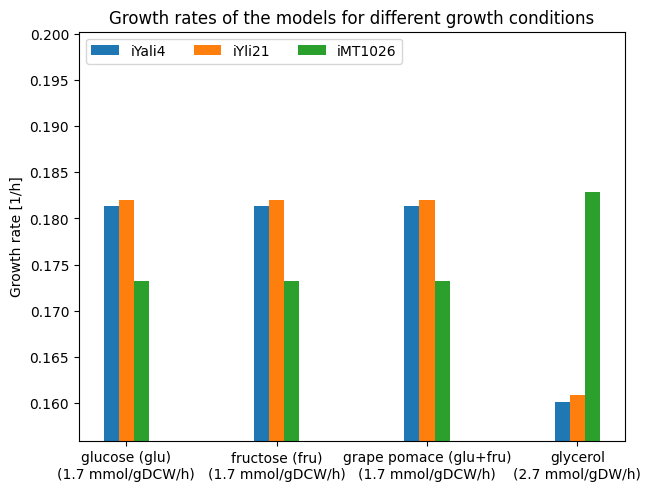

In [49]:
# plot differences in growth rates (not experimental data)
growth_conditions = [
    'glucose (glu)\n(2.43 mmol/gDCW/h)', 'fructose (fru)\n(0.36 mmol/gDCW/h)', 'grape pomace (glu+fru)\n(1.7 mmol/gDCW/h)', 'glycerol\n(2.7 mmol/gDW/h)'
]
model_growth = {
    'iYali4_model': [0.1813529778100622, 0.18135297781006351, 0.1813529778100635, 0.16012911081596112],
    'iYli21_model': [0.1820419198922858, 0.182041919892287, 0.18204191989228616, 0.16080292039710964],
    'iMT1026_model': [0.1731738400073746, 0.17317384000737404, 0.17317384000737426, 0.18287471372054162]
}

title = 'Growth rates of the models for different growth conditions' 
ylabel = 'Growth rate [1/h]'

plot_RSS(model_growth, growth_conditions, title, ylabel)

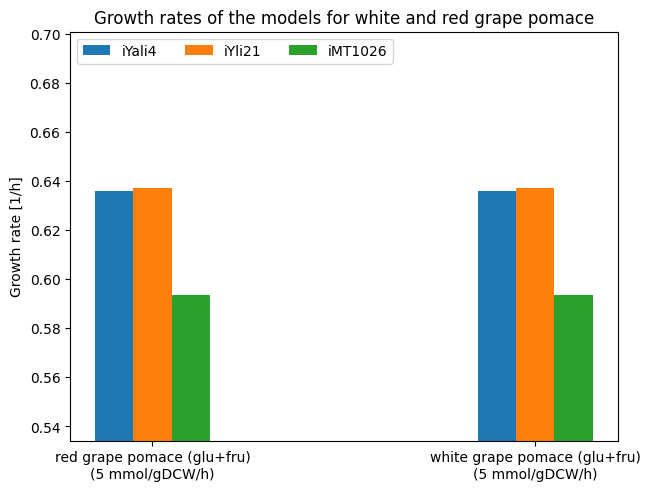

In [11]:
# grape pomace comparison (white and red)
growth_conditions = ['red grape pomace (glu+fru)\n(5 mmol/gDCW/h)', 'white grape pomace (glu+fru)\n(5 mmol/gDCW/h)']
model_growth = {
    'iYali4_model': [0.6359534020379776, 0.635953402037973],
    'iYli21_model': [0.6370884315688854, 0.6370884315688802],
    'iMT1026_model': [0.5933401834902114, 0.593340183490212]
}

title = 'Growth rates of the models for white and red grape pomace' 
ylabel = 'Growth rate [1/h]'

plot_RSS(model_growth, growth_conditions, title, ylabel)

### Experimental Data
- Yli: Glucose, Fructose, Glycerol
- Ppa: Sorbitol & Methanol, 

In [ ]:
# experimental data

### Oxygen and CO2 production differences (only control used)
# glucose: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3538582/ (oxygen differences)
strain_type = ['control', 'control', 'control', 'expression', 'expression', 'expression'] # expression means 
oxygen_condition = ['Normoxic', 'O2-limited', 'Hypoxic', 'Normoxic', 'O2-limited', 'Hypoxic']
glucose_uptake = [1.00, 1.28, 1.72, 1.01, 1.37, 1.56]
oxygen_uptake = [2.35, 2.01, 2.01, 2.44, 1.99, 1.81]
ppa_experimental_growth = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

### Production of CO2
CO2_production = [2.43, 2.55, 3.21, 2.52, 2.68, 2.94]
qX = [3.57,3.83,3.77,3.55,3.77,3.58]

### Different carbon sources and growth differences
conditions = ['glucose', '', 'grape pomace', 'glycerol']
growth_rates = [0.1, 0.36, 1.7, 0.19] # for glucose: or 3.57
uptake_rates = [1.0, 0.05, 0.05, 83.46] # mmol/gDCW/h
# find and set uptake rates

# collect results
# plot results

# fine tune plot (two different sites (ppa and yli))


#### Plot experimental data for glucose
- iMT1026
- iMT1026v3
- iLC915
- experimental

###### Gater simulation data (See FBA_analysis_glucose.ipynb)
- load models
- set all carbons to zero
- get the reactions (glucose, glycerol, oxygen, biomass, CO2)
- set the bounds accordingly
- print the data

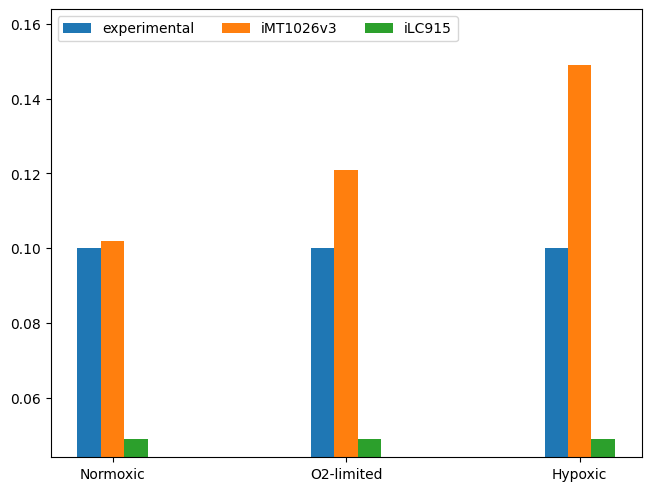

In [22]:
# prepare data and gather model results
growth_conditions = [
    'Normoxic', 'O2-limited', 'Hypoxic'
    ]

model_growth = {
    'experimental': [0.1, 0.1, 0.1],
    'iMT1026v3_model': [0.102, 0.121, 0.149],
    'iLC915_model': [0.049, 0.049, 0.049],
}
title = 'Experimental and simulated growth rates for the model iMT1026v3 and iLC915 on glucose under different O2 conditions respectively'
ylabel = 'Growth rate (g/gDCW)'
plot_RSS(model_growth, growth_conditions, title, ylabel)


In [18]:
min(model_growth.values())[0]
max(model_growth.values())[-1]

0.149

#### Plot CO2 prediction
- load model
- set condition ()

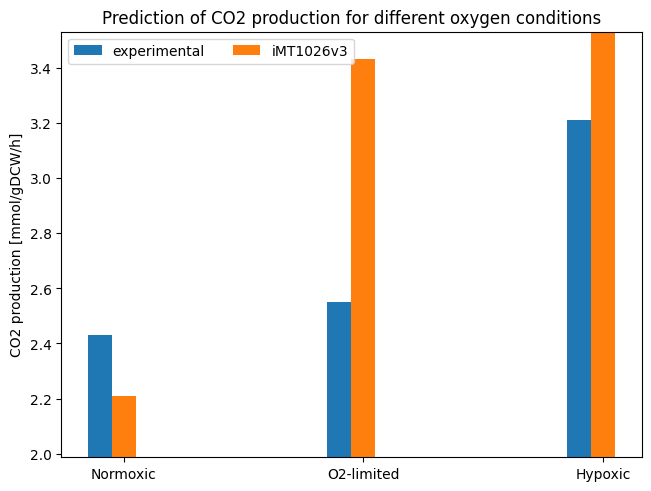

In [24]:
# prepare data and gather model results
growth_conditions = [
    'Normoxic', 'O2-limited', 'Hypoxic'
    ]

model_growth = {
    'experimental': [2.43, 2.55, 3.21],
    'iMT1026v3_model': [2.208, 3.431, 5.099],
    # 'iLC915_model': [0.049, 0.049, 0.049],
}
title = 'Prediction of CO2 production for different oxygen conditions'
ylabel = 'CO2 production [mmol/gDCW/h]'
plot_RSS(model_growth, growth_conditions, title, ylabel)